In [1]:
import os, time
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import numpy as np
import cv2
import tensorflow as tf
from glob import glob
from tqdm import tqdm
from keras.models import model_from_json
import tensorflow as tf
from keras.utils import load_img, img_to_array
from PIL import Image
from keras.utils import normalize
from skimage.transform import resize
from IPython.display import Image, display
from matplotlib import pyplot as plt
from tensorflow.keras.models import load_model
import json
from skimage import measure, color, io

In [2]:
# Load the model architecture
with open('D:\\Rooftop-Solar-Energy-Potential-Map\\ML\\models\\resnet_labelled.json', 'r') as f:
    model_architecture = json.load(f)

In [3]:
model = tf.keras.models.load_model("D:\\Rooftop-Solar-Energy-Potential-Map\\ML\\models\\resnet_labelled.h5", compile=False)

In [4]:
size = (256, 256)

In [5]:
# Create `results` directory with subfolders `mask` and `source`
results_dir = "D:\\Rooftop-Solar-Energy-Potential-Map\\ML\\data\\results"

if not os.path.exists(results_dir):
    os.makedirs(results_dir)
    os.makedirs(os.path.join(results_dir, "mask"))
    os.makedirs(os.path.join(results_dir, "source"))
else:
    print("folders already exist")

folders already exist


In [50]:
# path ='D:\\Rooftop-Solar-Energy-Potential-Map\\ML\\data\\external\\DL76_80a4_2_16.tif'
path = "14.png"

In [51]:
image = cv2.imread(path, cv2.IMREAD_COLOR)

In [52]:
image_2 = cv2.imread(path, 0)
test_img_norm = np.expand_dims(normalize(np.array(image_2), axis=1),2)
test_img_norm=test_img_norm[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img_norm, 0)

In [53]:
filename = os.path.basename(path)
filename_no_ext = os.path.splitext(filename)[0]
filename

'14.png'

In [54]:
name = filename.split("/")[-1].split(".")[0]
name

'14'

In [55]:
root_dir_source = 'D:\\Rooftop-Solar-Energy-Potential-Map\\ML\\data\\results\\source'
filename_ori = f'{name}.jpg'
filename_2 = f'{name}.tif'
save_path_original = os.path.join(root_dir_source, filename_ori)
save_path_ori = os.path.join(root_dir_source,filename_2)
cv2.imwrite(save_path_ori,image)
cv2.imwrite(save_path_original, image)

True

In [56]:
H, W, _ = image.shape
H, W, _

(827, 1191, 3)

In [57]:
image = cv2.resize(image, size)

In [58]:
H_N, W_N, _ = image.shape
H_N, W_N, _

(256, 256, 3)

In [59]:
image = image / 255.0
image = np.expand_dims(image, axis=0)       ## (1, 256, 256, 3)
image = image.astype(np.float32)

In [60]:
mask = model.predict(image)[0]

1/1 [==============================] - 0s 65ms/step


In [61]:
mask

array([[[0.34938556],
        [0.2174411 ],
        [0.26578113],
        ...,
        [0.2087886 ],
        [0.26884615],
        [0.431027  ]],

       [[0.2710361 ],
        [0.19153433],
        [0.14358799],
        ...,
        [0.13250187],
        [0.16471414],
        [0.24954227]],

       [[0.20993333],
        [0.1572176 ],
        [0.12424335],
        ...,
        [0.10065202],
        [0.16370732],
        [0.24074319]],

       ...,

       [[0.3128531 ],
        [0.19685854],
        [0.19680281],
        ...,
        [0.08383217],
        [0.11510322],
        [0.19727628]],

       [[0.3108137 ],
        [0.27912834],
        [0.2150189 ],
        ...,
        [0.10169978],
        [0.1399529 ],
        [0.23569523]],

       [[0.4584686 ],
        [0.2860303 ],
        [0.23268645],
        ...,
        [0.14731383],
        [0.20977503],
        [0.28635362]]], dtype=float32)

In [62]:
mask = cv2.resize(mask, (W, H))
mask = mask > 0.5
mask = mask * 255
mask = mask.astype(np.float32)

root_dir_mask = 'D:\\Rooftop-Solar-Energy-Potential-Map\\ML\\data\\results\\mask'


filename_mask = f'{name}.jpg'
filename_mask_tif = f'{name}.tif'


save_path_mask = os.path.join(root_dir_mask, filename_mask)
save_path_mask_tif = os.path.join(root_dir_mask, filename_mask_tif)


plt.imsave(save_path_mask, mask , cmap="gray")
cv2.imwrite(save_path_mask_tif, mask)

True

In [63]:
image = cv2.imread(path, cv2.IMREAD_COLOR)

(827, 1191, 3) (827, 1191, 3)


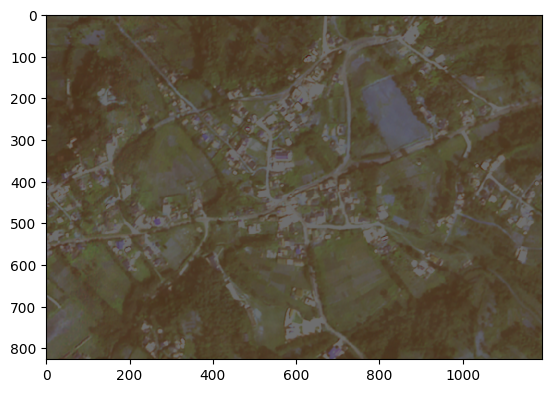

In [64]:
import matplotlib.pyplot as plt

# ...

mask_3c = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

# Scale the images to the range [0..1]
image_scaled = image / 255.0
mask_3c_scaled = mask_3c / 255.0

print(image_scaled.shape , mask_3c_scaled.shape)

# Define the weights for blending the images
alpha = 0.5  # weight for the original image
beta = 0.5  # weight for the predicted mask
gamma = 0  # scalar added to each sum

# Blend the images using addWeighted
overlay = cv2.addWeighted(image_scaled, alpha, mask_3c_scaled, beta, gamma, dtype=cv2.CV_64F)

# Scale the overlay back to the range [0..255]
overlay = (overlay * 255).astype(np.uint8)

# Display the overlaid image using Matplotlib
plt.imshow(overlay)
plt.show()

In [66]:
white_pixels = np.sum(mask == 255)

# Print the area in pixels
print("Area of predicted mask:", white_pixels, "pixels")

Area of predicted mask: 0 pixels


# Assuming Sun

In [ ]:
import pvlib
import pandas as pd

In [ ]:
# Load the image
img = cv2.imread('13.png')

# Define the constant building height (in meters)
building_height = 10

#define variable lat and long

lat = 37.7749
long = -122.4194

#define altitude
alt = 10

In [ ]:
# Define the location (latitude, longitude, and altitude)
location = pvlib.location.Location(latitude=lat, longitude=long, altitude=alt)
# Define the time of day (datetime object)
time = pd.Timestamp('2022-06-21 12:00:00-07:00')
location , time

In [ ]:
# Calculate the solar position (azimuth and declination)
solar_position = location.get_solarposition(time)
azimuth = solar_position.azimuth
declination = solar_position.apparent_zenith
solar_position

In [ ]:
azimuth.iloc[0]

# '''
#     Azimuth angle is a horizontal angle that measures the 
#     position of a celestial object along an observer's horizon. 
#     It's measured clockwise in degrees from a reference direction, 
#     usually north or south, to the point on the horizon where the object's 
#     line of altitude intersects. The line of altitude is a line that runs from
#     the observer's zenith through the object to the horizon. 
#     For example, if north is the reference point (0°), then east
#     has an azimuth of 90°, south is 180°, and so on through 360°.
# '''

In [ ]:
shadow_direction = azimuth.iloc[0] + 180
shadow_direction #west

In [ ]:
declination.shape

In [ ]:
declination.iloc[0]

In [ ]:
# building shadow height

shadow_height = building_height *np.tan(np.radians(90 - declination.iloc[0]))
shadow_height

In [ ]:
#Create a shadow mask with the same shape as the image
shadow_mask = np.zeros(img.shape[:2], dtype=np.uint8)
print(shadow_mask)

In [ ]:
np.unique(shadow_mask)

In [ ]:
# Iterate over each building footprint pixel
for y, x in np.ndindex(shadow_mask.shape):
    # Calculate the distance from the building footprint pixel to the sun's position
    distance = np.sqrt((x - img.shape[1] / 2) ** 2 + (y - img.shape[0] / 2) ** 2)
    
    # Calculate the shadow direction (in radians) based on the solar azimuth
    shadow_direction = np.arctan2(y - img.shape[0] / 2, x - img.shape[1] / 2) - azimuth.iloc[0]
    
    # Check if the pixel is in shadow
    if distance < shadow_height and np.abs(shadow_direction) < np.radians(90):
        shadow_mask[y, x] = 255


In [ ]:
print(shadow_mask)


In [ ]:
# Save the shadow mask
cv2.imwrite('shadow_mask.png', shadow_mask)


# Water shed algo

In [22]:
# Load the image and mask
# image = cv2.imread("D:\\Rooftop-Solar-Energy-Potential-Map\\ML\\data\\results\\source\\DL52_9309_8_3.jpg")
image = cv2.imread("data1.tif")

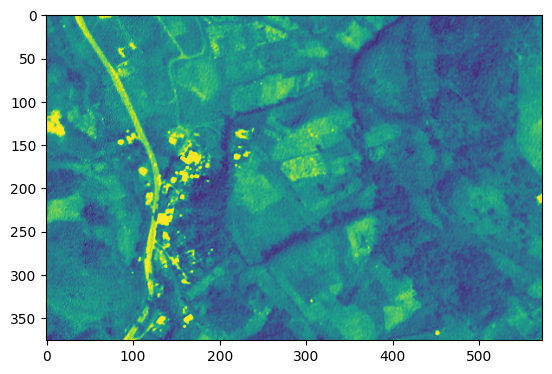

In [23]:
img_grey = image[:,:,0]
plt.imshow(img_grey)

In [24]:
ret1, thresh = cv2.threshold(img_grey, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)


In [25]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

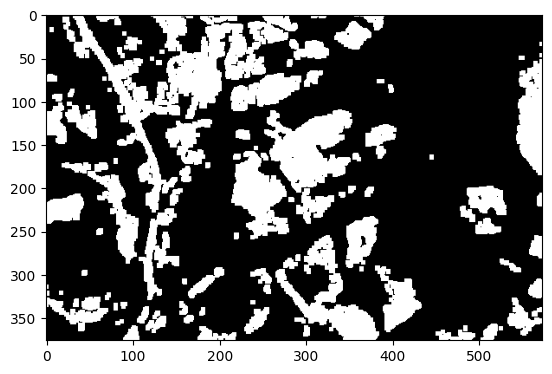

In [26]:
plt.imshow(opening, cmap="gray")

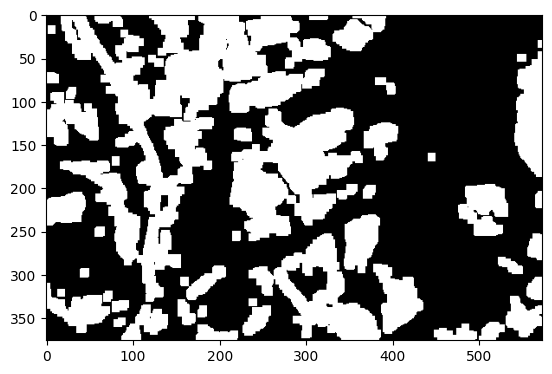

In [30]:
sure_bg = cv2.dilate(opening,kernel,iterations=2)
plt.imshow(sure_bg, cmap="gray")

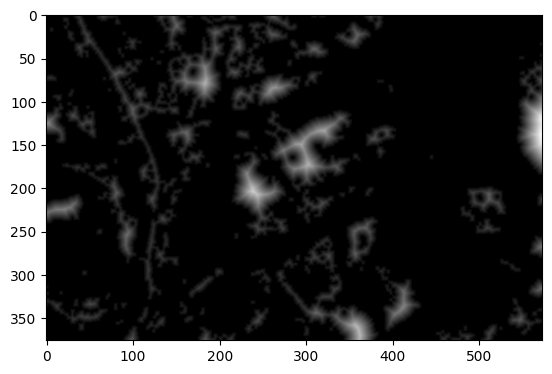

In [31]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
plt.imshow(dist_transform, cmap="gray")

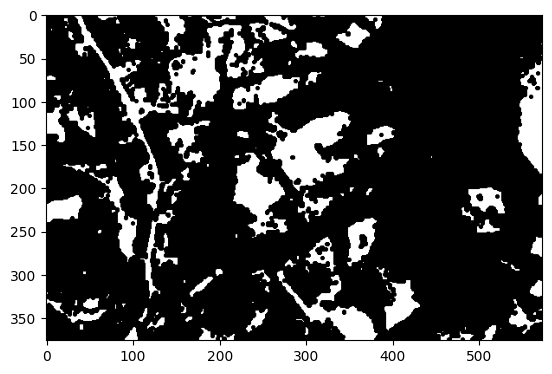

In [36]:
ret2, sure_fg = cv2.threshold(dist_transform, 0.1*dist_transform.max(),255,0)
plt.imshow(sure_fg, cmap="gray")

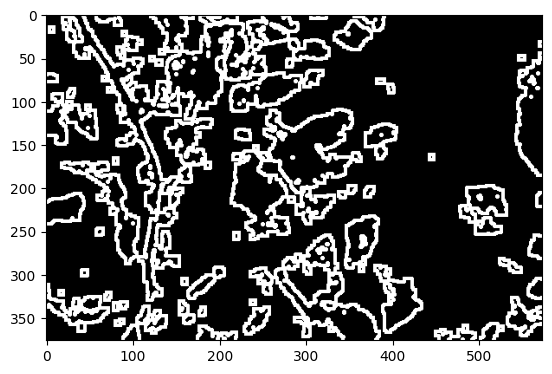

In [37]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
plt.imshow(unknown, cmap="gray")

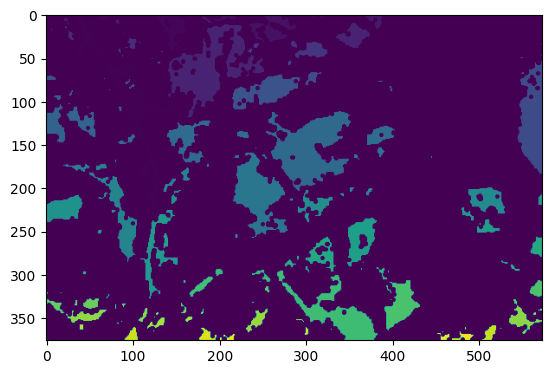

In [38]:
ret3, markers = cv2.connectedComponents(sure_fg)
plt.imshow(markers)

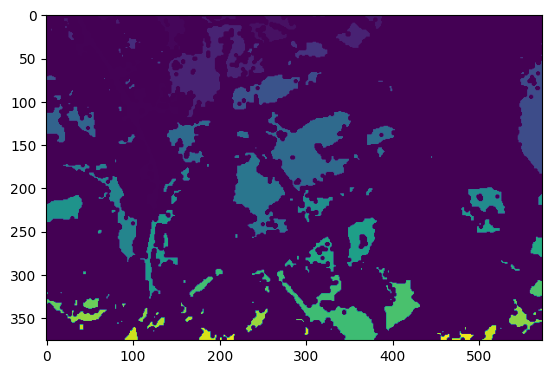

In [39]:
markers = markers+10
plt.imshow(markers)

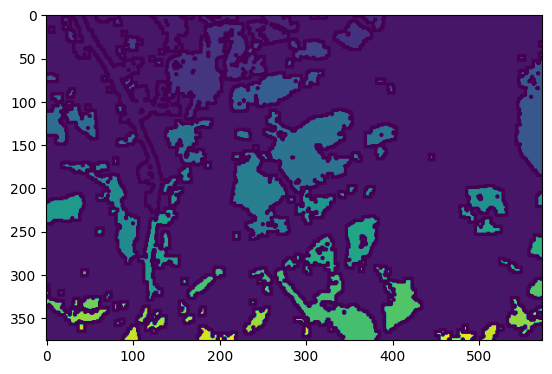

In [40]:
markers[unknown==255] = 0
plt.imshow(markers)

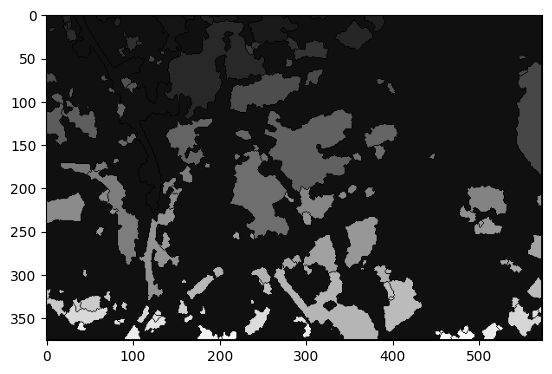

In [41]:
markers = cv2.watershed(image, markers)
plt.imshow(markers , cmap ="gray")

In [42]:
image[markers == -1] = [0,255,255] 

In [43]:
img2 = color.label2rgb(markers, bg_label=0)

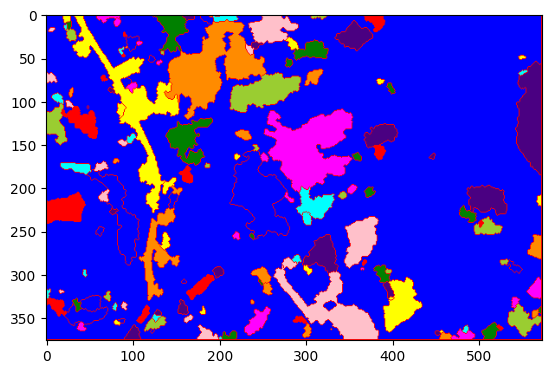

In [44]:
plt.imshow(img2)

In [45]:
props = measure.regionprops_table(markers, intensity_image=img_grey, 
                              properties=['label',
                                          'area','mean_intensity'])

In [46]:
import pandas as pd
df = pd.DataFrame(props)
df = df[df.mean_intensity > 100]  #Remove background or other regions that may be counted as objects

print(df.head())

   label      area  mean_intensity
0     10  148284.0      194.183621
1     11    4673.0      222.925530
2     12     119.0      231.722689
3     13     861.0      214.792102
4     14      58.0      204.724138


# Finding Area

In [69]:
Efficiency = 0.20
solar_panel_area = 1.5


In [71]:
# Calculate the sum of areas from index 1 to 4
total_area = df.loc[1:4, 'area'].sum()
total_area

5711.0

In [67]:
def calculate_monthly_average_radiance(data):
    try:
        dates = []
        radiance_values = []
        for date, value in data['properties']['parameter']['ALLSKY_SFC_SW_DWN'].items():
            dates.append(datetime.strptime(date, '%Y%m%d'))
            radiance_values.append(value)
        df = pd.DataFrame({'date': dates, 'radiance': radiance_values})
        df.set_index('date', inplace=True)
        monthly_avg_radiance = df.resample('ME').mean()
        return monthly_avg_radiance
    except KeyError as e:
        print(f"Error: Missing key in data response - {e}")
        return None


In [68]:
def calculate_solar_energy_potential(monthly_avg_radiance, area, efficiency):
    monthly_avg_radiance['total_energy'] = monthly_avg_radiance['radiance'] * area * efficiency  # Energy in Wh
    return monthly_avg_radiance